In [3]:
import numpy as np
import matplotlib.pyplot as plt
import enzyme_utils_new as utils
import scipy.stats as stats
import scipy

%config InlineBackend.figure_format='retina'

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

%load_ext autoreload
%autoreload 2

# Analytical posteriors for $D$

The 2D likelihood is: 

$$p(dx, dy \mid D) = \prod_{k=1}^M\left(\frac{1}{4\pi D \tau_k}\right)exp\left(-\sum_{k=1}^M\frac{dx^2_k + dy^2_k}{4D \tau_k}\right)$$

D has an inverse gamma prior: 

$$p(D \mid \alpha, \beta) = \frac{\beta^{\alpha}}{\text{Gamma}(\alpha)}D^{-\alpha-1}exp\left(-\frac{\beta}{D}\right) $$

The marginal likelihood is : 

$$p(dx, dy) = \int p(dx, dy, D)dD = \frac{\beta^{\alpha}\text{Gamma}(\alpha_0)}{\beta_0^{\alpha_0}\text{Gamma}(\alpha)}\prod_{k=1}^M\left(\frac{1}{4\pi\tau_k}\right) $$

where, 

$$\alpha_0 = M+\alpha$$
$$\beta_0 = \sum_{k=1}^M\frac{dx^2_k + dy^2_k}{4\tau_k}+\beta $$

The analytical full posterior is then: 

$$p(D \mid dx, dy) = \frac{\beta_0^{\alpha_0}}{\text{Gamma}(\alpha_0)}D^{-\alpha_0 - 1}exp\left(-\frac{\beta_0}{D}\right)$$

In [4]:
data_dir = ['new_data/transformed_buffer/', 'new_data/transformed_10uM/',  'new_data/transformed_100uM/', 
            'new_data/transformed_1mM/', 'new_data/transformed_10mM/', 'new_data/transformed_100mM/']

enzymes = utils.enzymeBayes(data_dir, ml=5)

15 files; 813 trajectories (length >= 5); Total 23909 data points
23 files; 2620 trajectories (length >= 5); Total 24420 data points
37 files; 2888 trajectories (length >= 5); Total 38102 data points
27 files; 2323 trajectories (length >= 5); Total 47103 data points
33 files; 4298 trajectories (length >= 5); Total 43865 data points
38 files; 3744 trajectories (length >= 5); Total 43599 data points


## Inference on all six substrate concentration dataset

In [9]:
mode, CI = [], []

for i in range(enzymes.n_conc):
    
    temp_mode, temp_CI = enzymes.computePosteriors(i, [j for j in range(len(enzymes.tot_track_info[i]))])
    mode.append(temp_mode)
    CI.append(temp_CI)

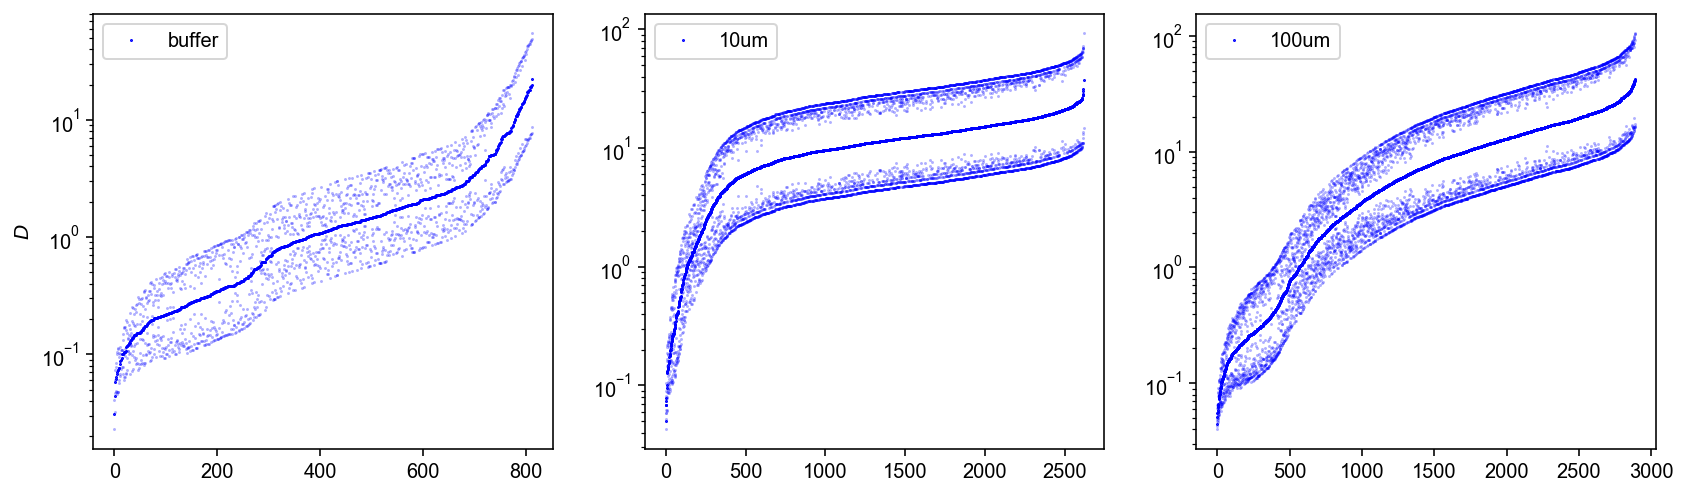

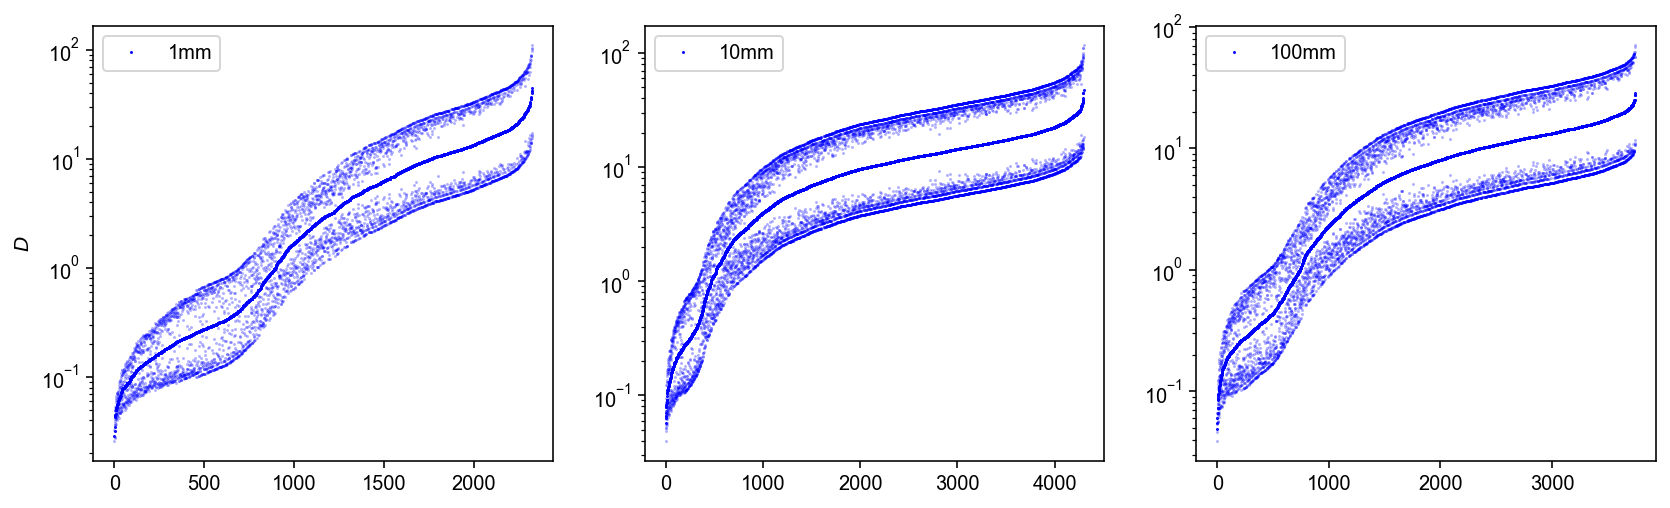

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
label = ['buffer', '10um', '100um', '1mm', '10mm', '100mm']

for i in range(3):
    isort = np.argsort(mode[i])
    axes[i].semilogy(mode[i][isort],'b.', ms=1, label=label[i])
    axes[i].semilogy(CI[i][:, 0][isort],'b.', ms=1, alpha=0.3)
    axes[i].semilogy(CI[i][:, 1][isort],'b.', ms=1, alpha=0.3)
    axes[i].legend()
axes[0].set_ylabel('$D$')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for i in range(3):
    i = i+3
    isort = np.argsort(mode[i])
    axes[i-3].semilogy(mode[i][isort],'b.', ms=1, label=label[i])
    axes[i-3].semilogy(CI[i][:, 0][isort],'b.', ms=1, alpha=0.3)
    axes[i-3].semilogy(CI[i][:, 1][isort],'b.', ms=1, alpha=0.3)
    axes[i-3].legend()
axes[0].set_ylabel('$D$')
plt.show()

Short tracks contains less information, and hence will have large uncertainty in $D$. Ordering the track by their inferred $D$, we see that in every dataset, there are many short tracks, and most of them seems to occpuy the high $D$ region. 

## Try longer tracks

In [ ]:
enzymes = utils.enzymeBayes(data_dir, ml=20)

mode, CI = [], []

for i in range(enzymes.n_conc):
    
    temp_mode, temp_CI = enzymes.computePosteriors(i, [j for j in range(len(enzymes.tot_track_info[i]))])
    mode.append(temp_mode)
    CI.append(temp_CI)

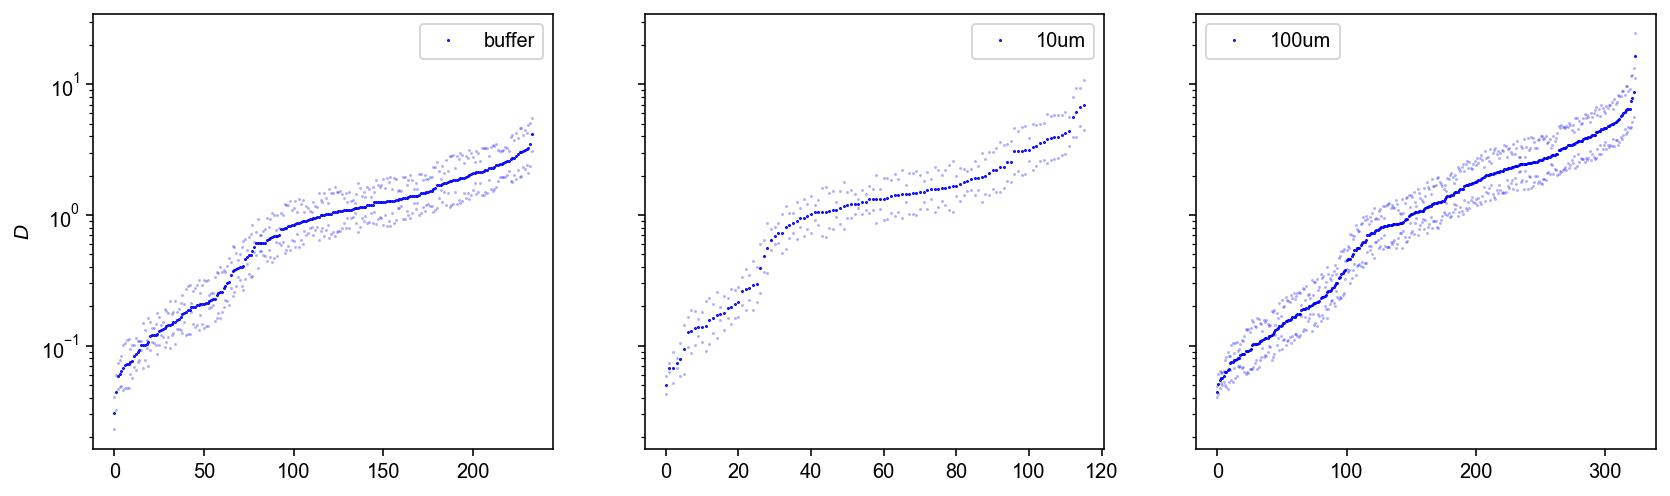

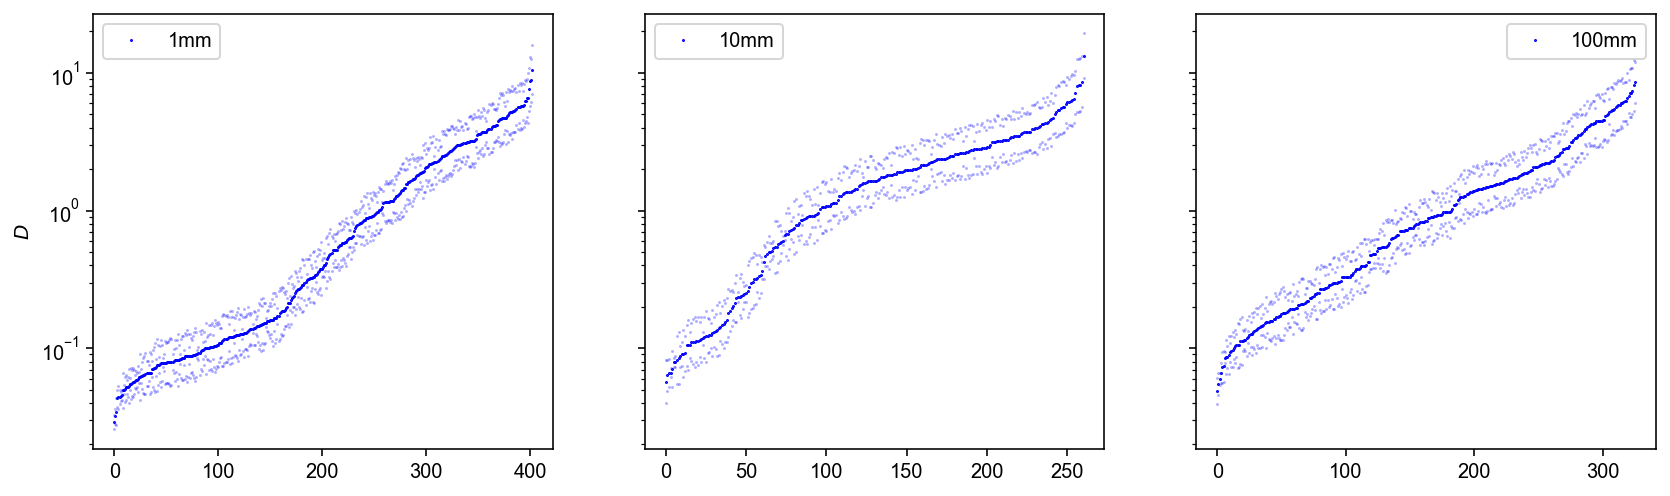

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
label = ['buffer', '10um', '100um', '1mm', '10mm', '100mm']

for i in range(3):
    isort = np.argsort(mode[i])
    axes[i].semilogy(mode[i][isort],'b.', ms=1, label=label[i])
    axes[i].semilogy(CI[i][:, 0][isort],'b.', ms=1, alpha=0.3)
    axes[i].semilogy(CI[i][:, 1][isort],'b.', ms=1, alpha=0.3)
    axes[i].legend()
axes[0].set_ylabel('$D$')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
for i in range(3):
    i = i+3
    isort = np.argsort(mode[i])
    axes[i-3].semilogy(mode[i][isort],'b.', ms=1, label=label[i])
    axes[i-3].semilogy(CI[i][:, 0][isort],'b.', ms=1, alpha=0.3)
    axes[i-3].semilogy(CI[i][:, 1][isort],'b.', ms=1, alpha=0.3)
    axes[i-3].legend()
axes[0].set_ylabel('$D$')
plt.show()